In [519]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

print("Setup Complete")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete


# **Data Analysis**

# Import Data

In [520]:
#Import data
jumo_data = pd.read_csv('input/jumo-data-08-12-2021-2/fresh_values.csv', sep=';')

#Show first 10 columns
jumo_data.head(10)

,id,Temp1,Temp2,Temp3,rH1,rH2,rH3,P1,P2,P3,TA,TB,VOC1,VOC2,CO2,rH,createdAt
0,1,23.0,24.0,22.0,44.0,45.0,43.0,999.9,998.7,996.4,24.0,25.0,12,13,400,45.5,2021-07-01 11:08:10
1,2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12,13,14,15.0,2021-07-01 11:08:10
2,3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12,13,14,15.0,2021-07-01 11:08:10
3,4,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12,13,14,15.0,2021-07-01 11:08:10
4,5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12,13,14,15.0,2021-07-01 11:08:10
5,6,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12,13,14,15.0,2021-07-01 11:08:10
6,7,271.0,268.0,275.0,380.0,370.0,383.0,9860.0,9870.0,9870.0,291.0,294.0,1336,1227,587,37.0,2021-07-01 11:08:10
7,8,271.0,268.0,275.0,380.0,370.0,383.0,9860.0,9870.0,9870.0,291.0,294.0,1343,1228,591,37.0,2021-07-01 11:08:10
8,9,27.1,26.8,27.5,38.0,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1337,1222,579,36.0,2021-07-01 11:08:10
9,10,27.1,26.8,27.5,37.9,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1338,1223,595,37.0,2021-07-01 11:08:10


In [521]:
#Correlations
correlations = jumo_data.corr()

print(correlations)

             id     Temp1     Temp2     Temp3       rH1       rH2       rH3  \
id     1.000000  0.466134  0.491863  0.492368 -0.822333  0.492132  0.483496   
Temp1  0.466134  1.000000  0.117365  0.116887 -0.715758  0.009774  0.001757   
Temp2  0.491863  0.117365  1.000000  0.999948 -0.368316  0.977584  0.976391   
Temp3  0.492368  0.116887  0.999948  1.000000 -0.367589  0.978235  0.976960   
rH1   -0.822333 -0.715758 -0.368316 -0.367589  1.000000 -0.276431 -0.266255   
rH2    0.492132  0.009774  0.977584  0.978235 -0.276431  1.000000  0.999809   
rH3    0.483496  0.001757  0.976391  0.976960 -0.266255  0.999809  1.000000   
P1    -0.021642  0.216563  0.075419  0.075460  0.145060  0.073597  0.075454   
P2     0.604909  0.146980  0.988346  0.988521 -0.451902  0.976562  0.974308   
P3     0.604842  0.146916  0.988356  0.988531 -0.451818  0.976581  0.974328   
TA    -0.797610 -0.103339 -0.420397 -0.421227  0.636126 -0.462354 -0.455823   
TB    -0.770897 -0.059295 -0.400980 -0.401773  0.611

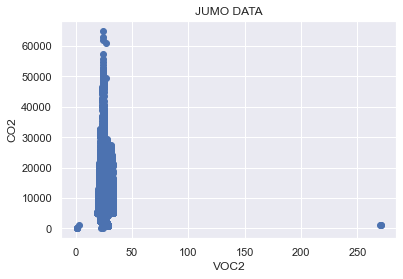

In [522]:
def visualise(data,number_one,number_two):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,number_one].values, data.iloc[:,number_two].values)
    ax.set_title('JUMO DATA')
    ax.set_xlabel('VOC2')
    ax.set_ylabel('CO2')

visualise(jumo_data,1,13)

# Data Cleaning

In [523]:
#Deleting first 6 rows
new_jumo_data = jumo_data.drop([0,1,2,3,4,5,6,7])
new_jumo_data.head()

,id,Temp1,Temp2,Temp3,rH1,rH2,rH3,P1,P2,P3,TA,TB,VOC1,VOC2,CO2,rH,createdAt
8,9,27.10,26.8,27.5,38.0,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1337,1222,579,36.0,2021-07-01 11:08:10
9,10,27.10,26.8,27.5,37.9,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1338,1223,595,37.0,2021-07-01 11:08:10
10,11,2.71,26.8,27.5,37.9,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1339,1230,591,36.0,2021-07-01 11:08:10
11,12,27.10,26.8,27.5,37.9,37.0,38.2,986.0,987.0,987.0,29.2,29.4,1346,1224,587,36.0,2021-07-01 11:08:10
12,13,27.10,26.8,27.5,37.9,37.0,38.2,986.0,987.0,987.0,29.2,29.4,1336,1226,574,36.0,2021-07-01 11:08:10


<AxesSubplot:ylabel='Temp1'>

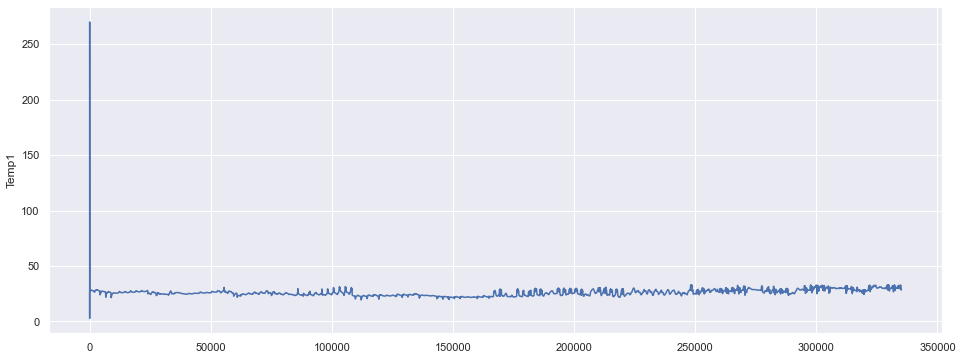

In [524]:
plt.figure(figsize=(16,6))

sns.lineplot(data=new_jumo_data['Temp1'])

In [525]:
# get the number of missing data points per column
missing_values_count = new_jumo_data.isnull().sum()

# look at the # of missing points in the columns
missing_values_count[0:17]

id           0
Temp1        0
Temp2        0
Temp3        0
rH1          0
rH2          0
rH3          0
P1           0
P2           0
P3           0
TA           0
TB           0
VOC1         0
VOC2         0
CO2          0
rH           0
createdAt    0
dtype: int64

In [526]:
# how many total missing values do we have?
total_cells = np.product(new_jumo_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)


0.0


## **Drop NaN Data**

In [527]:
rows_with_na_dropped = new_jumo_data.dropna(axis=0)
rows_with_na_dropped.head()

,id,Temp1,Temp2,Temp3,rH1,rH2,rH3,P1,P2,P3,TA,TB,VOC1,VOC2,CO2,rH,createdAt
8,9,27.10,26.8,27.5,38.0,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1337,1222,579,36.0,2021-07-01 11:08:10
9,10,27.10,26.8,27.5,37.9,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1338,1223,595,37.0,2021-07-01 11:08:10
10,11,2.71,26.8,27.5,37.9,37.0,38.3,986.0,987.0,987.0,29.2,29.4,1339,1230,591,36.0,2021-07-01 11:08:10
11,12,27.10,26.8,27.5,37.9,37.0,38.2,986.0,987.0,987.0,29.2,29.4,1346,1224,587,36.0,2021-07-01 11:08:10
12,13,27.10,26.8,27.5,37.9,37.0,38.2,986.0,987.0,987.0,29.2,29.4,1336,1226,574,36.0,2021-07-01 11:08:10


In [528]:
print("Total Rows in original dataset: %d \n" % new_jumo_data.shape[0])
print("Toral Rows after the drop: %d \n" % rows_with_na_dropped.shape[0])
print("Lost Rows: %d" % (new_jumo_data.shape[0]-rows_with_na_dropped.shape[0]))

Total Rows in original dataset: 335063 

Toral Rows after the drop: 335063 

Lost Rows: 0


In [529]:
# get the number of missing data points per column
missing_values_count = rows_with_na_dropped.isnull().sum()

# look at the # of missing points in the columns
missing_values_count[0:17]

id           0
Temp1        0
Temp2        0
Temp3        0
rH1          0
rH2          0
rH3          0
P1           0
P2           0
P3           0
TA           0
TB           0
VOC1         0
VOC2         0
CO2          0
rH           0
createdAt    0
dtype: int64

## **Fill the NaN Data**

In [530]:
filled_jumo_data = new_jumo_data.fillna(method='bfill', axis=0).fillna(0)

In [531]:
print("Total Rows in original dataset: %d \n" % new_jumo_data.shape[0])
print("Toral Rows after the fill: %d" % filled_jumo_data.shape[0])

Total Rows in original dataset: 335063 

Toral Rows after the fill: 335063


In [532]:
# get the number of missing data points per column
missing_values_count = filled_jumo_data.isnull().sum()

# look at the # of missing points in the columns
missing_values_count[0:17]

id           0
Temp1        0
Temp2        0
Temp3        0
rH1          0
rH2          0
rH3          0
P1           0
P2           0
P3           0
TA           0
TB           0
VOC1         0
VOC2         0
CO2          0
rH           0
createdAt    0
dtype: int64

## **Find Outlier**

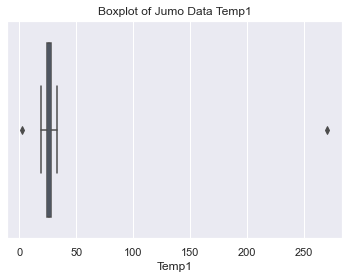

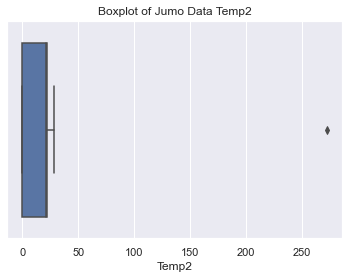

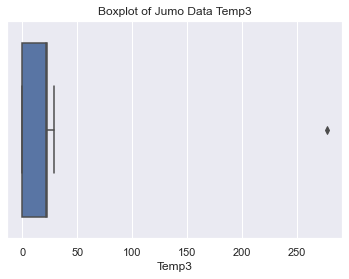

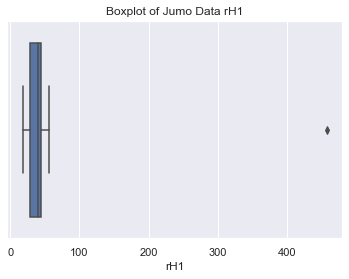

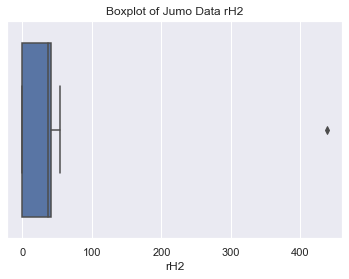

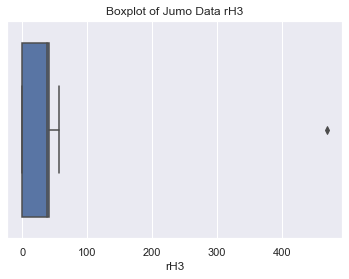

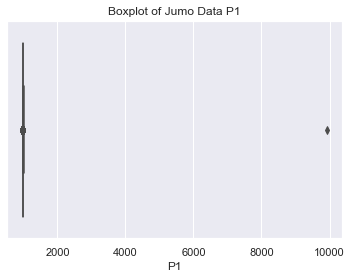

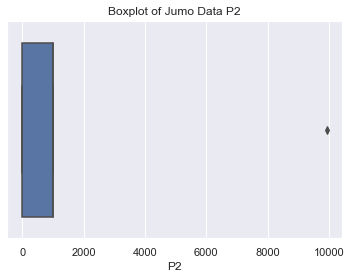

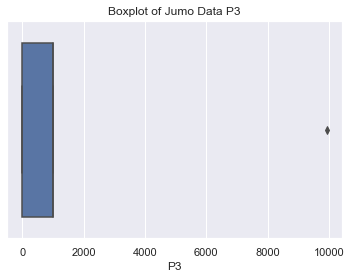

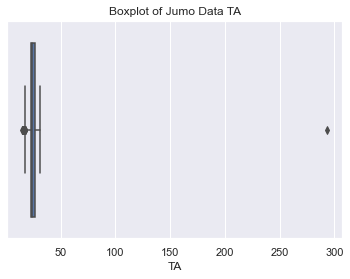

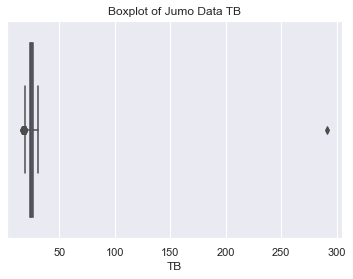

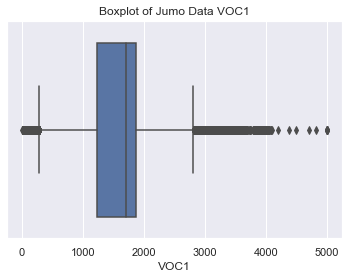

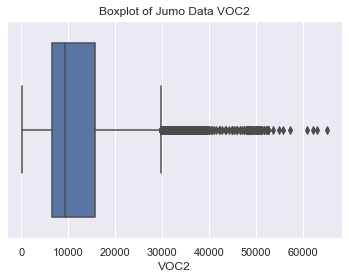

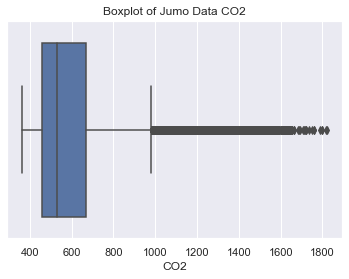

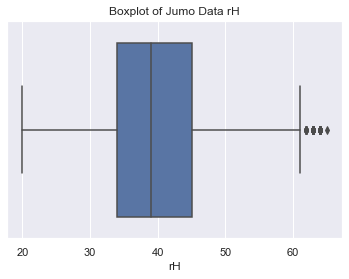

In [533]:
def boxplot(data):

    for i in range(1, len(data.columns)-1):
        sns.boxplot(data=data,x=data[f"{data.columns[i]}"])
        plt.title(f"Boxplot of Jumo Data {data.columns[i]}")
        plt.show()
boxplot(rows_with_na_dropped)

In [534]:
print(filled_jumo_data)

            id  Temp1  Temp2  Temp3   rH1   rH2   rH3     P1     P2     P3  \
8            9  27.10   26.8   27.5  38.0  37.0  38.3  986.0  987.0  987.0   
9           10  27.10   26.8   27.5  37.9  37.0  38.3  986.0  987.0  987.0   
10          11   2.71   26.8   27.5  37.9  37.0  38.3  986.0  987.0  987.0   
11          12  27.10   26.8   27.5  37.9  37.0  38.2  986.0  987.0  987.0   
12          13  27.10   26.8   27.5  37.9  37.0  38.2  986.0  987.0  987.0   
...        ...    ...    ...    ...   ...   ...   ...    ...    ...    ...   
335066  335067  28.80   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335067  335068  28.80   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335068  335069  28.80   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335069  335070  28.90   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335070  335071  28.90   21.1   21.7  22.6  32.2  32.6  978.0  979.0  979.0   

          TA    TB  VOC1  VOC2  CO2    rH            createdAt 

In [535]:
#Remove outliers by percentile threshold
def getPercentileFilled(data):
    global filled_jumo_data
    for i in range(1, len(data.columns)-1):
        p = np.percentile(data[data.columns[i]], 85)
        q = np.percentile(data[data.columns[i]], 15)
        filled_jumo_data = filled_jumo_data[data[data.columns[i]] < p]
        filled_jumo_data = filled_jumo_data[data[data.columns[i]] > q]
        print(data.columns[i],p, q)

def getPercentileDrop(data):
    global rows_with_na_dropped
    for i in range(1, len(data.columns)-1):
        p = np.percentile(data[data.columns[i]], 85)
        q = np.percentile(data[data.columns[i]], 15)
        rows_with_na_dropped = rows_with_na_dropped[data[data.columns[i]] < p]
        rows_with_na_dropped = rows_with_na_dropped[data[data.columns[i]] > q]
        print(data.columns[i],p, q)


In [536]:
#getPercentileFilled(filled_jumo_data)

In [537]:
#getPercentileDrop(rows_with_na_dropped)

In [538]:
print(filled_jumo_data)

            id  Temp1  Temp2  Temp3   rH1   rH2   rH3     P1     P2     P3  \
8            9  27.10   26.8   27.5  38.0  37.0  38.3  986.0  987.0  987.0   
9           10  27.10   26.8   27.5  37.9  37.0  38.3  986.0  987.0  987.0   
10          11   2.71   26.8   27.5  37.9  37.0  38.3  986.0  987.0  987.0   
11          12  27.10   26.8   27.5  37.9  37.0  38.2  986.0  987.0  987.0   
12          13  27.10   26.8   27.5  37.9  37.0  38.2  986.0  987.0  987.0   
...        ...    ...    ...    ...   ...   ...   ...    ...    ...    ...   
335066  335067  28.80   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335067  335068  28.80   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335068  335069  28.80   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335069  335070  28.90   21.1   21.7  22.6  32.2  32.6  978.0  980.0  979.0   
335070  335071  28.90   21.1   21.7  22.6  32.2  32.6  978.0  979.0  979.0   

          TA    TB  VOC1  VOC2  CO2    rH            createdAt 

In [539]:
#boxplot(rows_with_na_dropped)

In [540]:
#def drop_outliers(data, field_name):
#    iqr = 1.5 * (np.percentile(data[field_name], 75) -np.percentile(data[field_name], 25))
#    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
#    data.drop(data[data[field_name] < (iqr + np.percentile(data[field_name], 25))].index, inplace=True)

## **Columns Summarize**

In [541]:
#Feature Engineering
# Merge data of sensors 2 and 3 in R(oom) variables

rows_with_na_dropped['TempR'] = rows_with_na_dropped[['Temp2', 'Temp3']].mean(axis=1)
rows_with_na_dropped['rHR'] = rows_with_na_dropped[['rH2', 'rH3']].mean(axis=1)
rows_with_na_dropped['PR'] = rows_with_na_dropped[['P2', 'P3']].mean(axis=1)

rows_with_na_dropped = rows_with_na_dropped.drop(['id','Temp2','Temp3','rH2', 'rH3', 'P2', 'P3'], 1)


rows_with_na_dropped.head(10)

C:\Users\gostn\AppData\Local\Temp/ipykernel_18524/2678492840.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rows_with_na_dropped = rows_with_na_dropped.drop(['id','Temp2','Temp3','rH2', 'rH3', 'P2', 'P3'], 1)


,Temp1,rH1,P1,TA,TB,VOC1,VOC2,CO2,rH,createdAt,TempR,rHR,PR
8,27.10,38.0,986.0,29.2,29.4,1337,1222,579,36.0,2021-07-01 11:08:10,27.15,37.65,987.0
9,27.10,37.9,986.0,29.2,29.4,1338,1223,595,37.0,2021-07-01 11:08:10,27.15,37.65,987.0
10,2.71,37.9,986.0,29.2,29.4,1339,1230,591,36.0,2021-07-01 11:08:10,27.15,37.65,987.0
11,27.10,37.9,986.0,29.2,29.4,1346,1224,587,36.0,2021-07-01 11:08:10,27.15,37.60,987.0
12,27.10,37.9,986.0,29.2,29.4,1336,1226,574,36.0,2021-07-01 11:08:10,27.15,37.60,987.0
13,27.10,37.9,986.0,29.2,29.4,1343,1225,583,36.0,2021-07-01 11:08:10,27.15,37.60,986.5
14,27.10,37.9,986.0,29.2,29.4,1341,1221,587,36.0,2021-07-01 11:08:10,27.15,37.60,986.5
15,27.70,43.0,986.0,29.5,29.8,1456,1488,419,41.0,2021-07-01 11:08:10,27.85,42.70,987.0
16,27.80,43.2,986.0,29.8,30.0,1358,1164,474,42.0,2021-07-01 11:08:10,27.90,42.95,986.5
17,270.00,458.0,9920.0,293.0,291.0,1390,1052,776,48.0,2021-07-01 11:08:10,274.50,453.50,9930.0


In [542]:
# Merge data of sensors 2 and 3 in R(oom) variables

filled_jumo_data['TempR'] = filled_jumo_data[['Temp2', 'Temp3']].mean(axis=1)
filled_jumo_data['rHR'] = filled_jumo_data[['rH2', 'rH3']].mean(axis=1)
filled_jumo_data['PR'] = filled_jumo_data[['P2', 'P3']].mean(axis=1)

filled_jumo_data = filled_jumo_data.drop(['id','Temp2','Temp3','rH2', 'rH3', 'P2', 'P3'], 1)

C:\Users\gostn\AppData\Local\Temp/ipykernel_18524/3664455266.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  filled_jumo_data = filled_jumo_data.drop(['id','Temp2','Temp3','rH2', 'rH3', 'P2', 'P3'], 1)


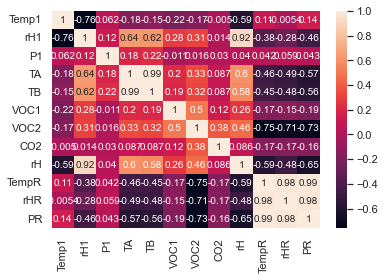

In [543]:
corrMatrixOne = filled_jumo_data.corr()
sns.heatmap(corrMatrixOne, annot=True)
plt.show()

In [544]:
rows_with_na_dropped.corr()

,Temp1,rH1,P1,TA,TB,VOC1,VOC2,CO2,rH,TempR,rHR,PR
Temp1,1.000000,-0.760044,0.061670,-0.179527,-0.146694,-0.216679,-0.173199,-0.004986,-0.591286,0.105792,-0.005423,0.138957
rH1,-0.760044,1.000000,0.117220,0.638648,0.618558,0.280084,0.306552,0.014445,0.915682,-0.376208,-0.277328,-0.459323
P1,0.061670,0.117220,1.000000,0.182121,0.218842,-0.011192,0.016208,0.030406,0.039931,0.042078,0.059461,0.043120
TA,-0.179527,0.638648,0.182121,1.000000,0.993869,0.204720,0.333936,0.087451,0.596149,-0.458438,-0.493632,-0.574682
TB,-0.146694,0.618558,0.218842,0.993869,1.000000,0.190003,0.315299,0.086655,0.579288,-0.448820,-0.484735,-0.564437
VOC1,-0.216679,0.280084,-0.011192,0.204720,0.190003,1.000000,0.501451,0.123107,0.263715,-0.169564,-0.153196,-0.191701
VOC2,-0.173199,0.306552,0.016208,0.333936,0.315299,0.501451,1.000000,0.383595,0.455394,-0.750245,-0.709867,-0.728072
CO2,-0.004986,0.014445,0.030406,0.087451,0.086655,0.123107,0.383595,1.000000,0.085508,-0.172540,-0.168098,-0.158748
rH,-0.591286,0.915682,0.039931,0.596149,0.579288,0.263715,0.455394,0.085508,1.000000,-0.592026,-0.484290,-0.649903
TempR,0.105792,-0.376208,0.042078,-0.458438,-0.448820,-0.169564,-0.750245,-0.172540,-0.592026,1.000000,0.977385,0.988478


In [545]:
print('Number of rows and columns after removing missing values:', jumo_data.shape)
print('The time series starts from: ', jumo_data['createdAt'].min())
print('The time series ends on: ', jumo_data['createdAt'].max())

Number of rows and columns after removing missing values: (335071, 17)
The time series starts from:  2021-07-01 11:08:10
The time series ends on:  2021-12-08 16:34:24


In [546]:
# Add createdAt at index row

jumo_data = filled_jumo_data.set_index('createdAt')
print(jumo_data)


                     Temp1   rH1     P1    TA    TB  VOC1  VOC2  CO2    rH  \
createdAt                                                                    
2021-07-01 11:08:10  27.10  38.0  986.0  29.2  29.4  1337  1222  579  36.0   
2021-07-01 11:08:10  27.10  37.9  986.0  29.2  29.4  1338  1223  595  37.0   
2021-07-01 11:08:10   2.71  37.9  986.0  29.2  29.4  1339  1230  591  36.0   
2021-07-01 11:08:10  27.10  37.9  986.0  29.2  29.4  1346  1224  587  36.0   
2021-07-01 11:08:10  27.10  37.9  986.0  29.2  29.4  1336  1226  574  36.0   
...                    ...   ...    ...   ...   ...   ...   ...  ...   ...   
2021-12-08 16:32:00  28.80  22.6  978.0  22.8  23.5   628  5427  478  28.0   
2021-12-08 16:32:29  28.80  22.6  978.0  22.8  23.5   581  5401  470  28.0   
2021-12-08 16:33:27  28.80  22.6  978.0  22.8  23.5   577  5423  482  28.0   
2021-12-08 16:33:55  28.90  22.6  978.0  22.8  23.5   600  5438  486  28.0   
2021-12-08 16:34:24  28.90  22.6  978.0  22.8  23.5   568  5433 

In [547]:
# Create data set with only newer data
jumo_NEW = jumo_data.loc['2021-09-06 07:13:53':'2021-12-08 16:34:24']
#missing_values_count = jumo_NEW.isnull().sum()
#print(missing_values_count)
jumo_NEW.describe()


,Temp1,rH1,P1,TA,TB,VOC1,VOC2,CO2,rH,TempR,rHR,PR
count,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000,225527.000000
mean,26.182026,33.554748,993.204920,23.458718,24.071785,1525.423705,9448.661584,588.094357,36.446594,22.005615,39.451959,994.143342
std,2.976616,9.274596,8.130107,1.106883,0.882131,540.570539,3827.996128,172.219169,6.000991,0.947823,4.727996,8.124738
min,19.400000,17.800000,969.000000,15.000000,16.900000,32.000000,4000.000000,386.000000,20.000000,19.150000,26.250000,970.000000
25%,23.500000,26.300000,989.000000,22.700000,23.500000,1059.000000,6433.000000,457.000000,32.000000,21.300000,36.300000,990.000000
50%,26.000000,31.500000,994.000000,23.100000,23.800000,1596.000000,8519.000000,541.000000,36.000000,21.700000,39.500000,995.000000
75%,28.600000,42.800000,1000.000000,23.900000,24.600000,1947.000000,11067.000000,658.000000,41.000000,22.550000,42.650000,1001.000000
max,33.000000,56.500000,1008.000000,27.400000,27.300000,3546.000000,32657.000000,1821.000000,57.000000,25.150000,54.600000,1009.000000


In [548]:
ar_values = jumo_NEW.values[:, 1:]
print("ar_values: {}".format(ar_values.shape))

# these are all numeric columns and it is for array
in_num_col     = ar_values.shape[1]
ts_columns_int = rows_with_na_dropped.columns[1:].to_list()
ar_idxes_int   = np.arange(0, in_num_col)

# index for column containing string data types
ar_idxes_str = np.array([])

# index of target variable - it will be 1 in array and 2 in original data frame
in_target_idx = 1

# work only on training
fo_train_ratio = 0.80
fo_test_ratio = 0.20


ar_values: (225527, 11)


In [549]:
def identify_outlier(sigma = 3.0):
    """
    Aims:
     - assuming each attribute follows normal distribution, any data that are extermely
       skewed are considered as outlier.
     - identify the outlier of each feature with numeric value.
     - update the outlier values with respective mean observed from training dataset.
    Parameters:
      sigma: number of sigma to detect outlier by default 3 sigma (standard deviation) from mean is considered as outlier
    """

    in_num_sample   = ar_values.shape[0]
    in_ubound       = int(fo_train_ratio * in_num_sample)
    print("INFO: sigma for outliers: {}".format(sigma))

    # find outlier
    print(ar_idxes_int.shape)
    for idx in np.arange(ar_idxes_int.shape[0]):
      fo_mean   = ar_values[:in_ubound, idx].mean(axis=0)
      fo_std    = ar_values[:in_ubound, idx].std(axis=0)
      print("INFO: feature: {0:s} mean: {1:.2f} std: {2:.2f}".format(ts_columns_int[idx], fo_mean, fo_std))

      # Upper bound
      fo_ubound = fo_mean + (sigma * fo_std)
      ar_outlier = (ar_values[:, idx] >= fo_ubound)
      in_num_outlier = ar_outlier.sum()
      if in_num_outlier > 0:
        ar_values[ar_outlier, idx] = fo_mean
        print("INFO: UPPER BOUND - threshold: {0:.2f} # of outlier: {1:d}".format(fo_ubound, in_num_outlier))

      # Lower bound
      fo_ubound = fo_mean - (sigma * fo_std)
      ar_outlier = (ar_values[:, idx] <= fo_ubound)
      in_num_outlier = ar_outlier.sum()
      if in_num_outlier > 0:
        ar_values[ar_outlier, idx] = fo_mean
        print("INFO: LOWER BOUND - threshold: {0:.2f} # of outlier: {1:d}".format(fo_ubound, ar_outlier.sum()))

    print("INFO: outliers were identified and updated with respective mean, if required.")

In [550]:
identify_outlier(5)

INFO: sigma for outliers: 5
(11,)
INFO: feature: rH1 mean: 36.36 std: 8.18
INFO: feature: P1 mean: 995.47 std: 6.05
INFO: feature: TA mean: 23.69 std: 1.08
INFO: LOWER BOUND - threshold: 18.27 # of outlier: 167
INFO: feature: TB mean: 24.27 std: 0.84
INFO: LOWER BOUND - threshold: 20.07 # of outlier: 214
INFO: feature: VOC1 mean: 1525.43 std: 553.80
INFO: feature: VOC2 mean: 9443.26 std: 3846.28
INFO: UPPER BOUND - threshold: 28674.64 # of outlier: 35
INFO: feature: CO2 mean: 591.09 std: 169.00
INFO: UPPER BOUND - threshold: 1436.09 # of outlier: 195
INFO: feature: rH mean: 38.39 std: 5.00
INFO: feature: createdAt mean: 22.22 std: 0.93
INFO: feature: TempR mean: 41.04 std: 3.80
INFO: feature: rHR mean: 996.40 std: 6.05
INFO: outliers were identified and updated with respective mean, if required.


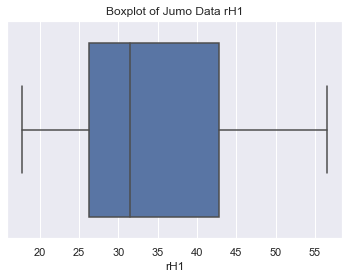

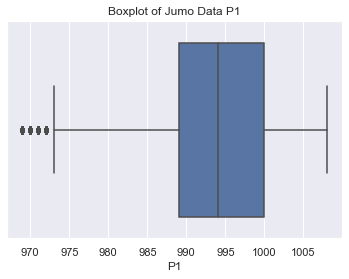

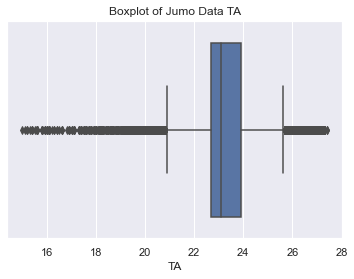

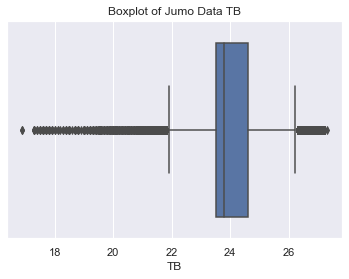

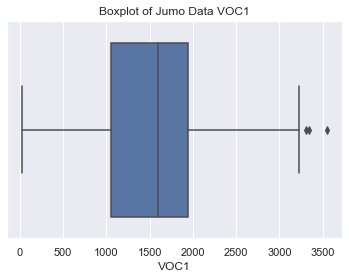

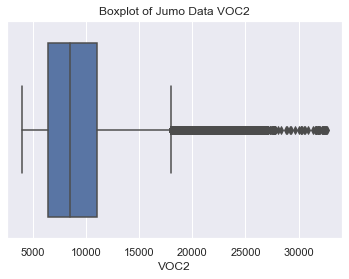

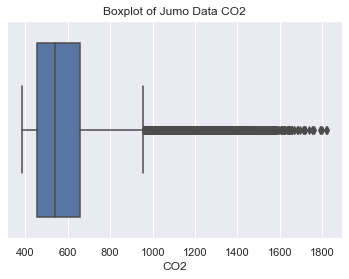

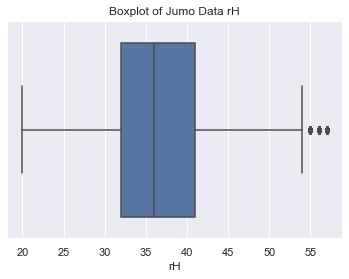

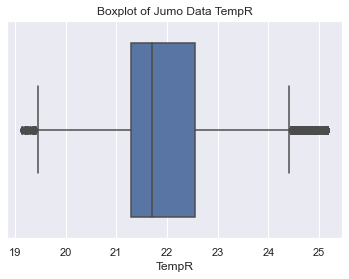

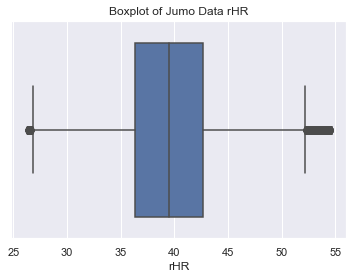

In [551]:
boxplot(jumo_NEW)

<AxesSubplot:xlabel='createdAt'>

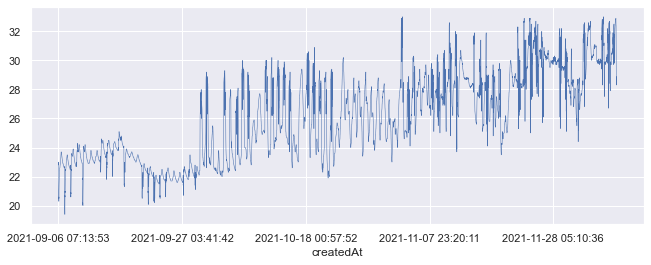

In [552]:
# Plot time series data
sns.set(rc={'figure.figsize':(11,4)})
jumo_NEW['Temp1'].plot(linewidth=0.5)

<AxesSubplot:xlabel='createdAt'>

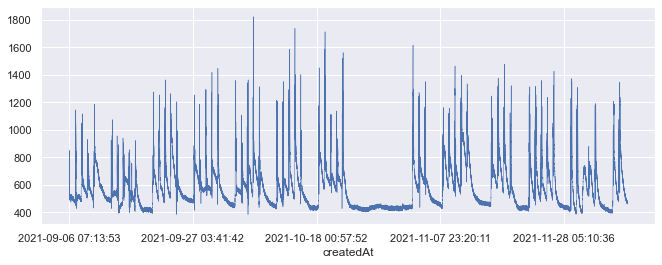

In [553]:
jumo_NEW['CO2'].plot(linewidth=0.5)

In [554]:
sampler = jumo_NEW
sampler = sampler[~sampler.index.duplicated()]
sampler


,Temp1,rH1,P1,TA,TB,VOC1,VOC2,CO2,rH,TempR,rHR,PR
createdAt,,,,,,,,,,,,
2021-09-06 07:13:53,22.8,42.4,1000.0,25.0,24.8,702,6706,503,41.0,23.2,41.50,1001.0
2021-09-06 07:14:51,22.8,42.4,1000.0,25.0,24.9,702,6632,503,40.0,23.2,41.50,1001.0
2021-09-06 07:15:20,22.8,42.4,1000.0,24.9,24.8,702,6580,499,40.0,23.2,41.50,1001.0
2021-09-06 07:15:49,22.8,42.4,1000.0,24.9,24.8,704,6606,511,40.0,23.2,41.55,1001.0
2021-09-06 07:16:47,22.8,42.4,1000.0,24.9,24.8,697,6533,499,40.0,23.2,41.55,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08 16:32:00,28.8,22.6,978.0,22.8,23.5,628,5427,478,28.0,21.4,32.40,979.5
2021-12-08 16:32:29,28.8,22.6,978.0,22.8,23.5,581,5401,470,28.0,21.4,32.40,979.5
2021-12-08 16:33:27,28.8,22.6,978.0,22.8,23.5,577,5423,482,28.0,21.4,32.40,979.5


In [555]:
#sns.pairplot(sampler)
#plt.show()

### Split

In [556]:

from datetime import datetime
jumo_NEW = jumo_NEW.reset_index()
#jumo_NEW['DateTime'] = pd.to_datetime(jumo_NEW['createdAt'])
#jumo_NEW['Timestamp'] = jumo_NEW.TimeUnix.values.astype(np.int64)

In [557]:
jumo_NEW.head(1000)

,createdAt,Temp1,rH1,P1,TA,TB,VOC1,VOC2,CO2,rH,TempR,rHR,PR
0,2021-09-06 07:13:53,22.8,42.4,1000.0,25.0,24.8,702,6706,503,41.0,23.20,41.50,1001.0
1,2021-09-06 07:14:51,22.8,42.4,1000.0,25.0,24.9,702,6632,503,40.0,23.20,41.50,1001.0
2,2021-09-06 07:15:20,22.8,42.4,1000.0,24.9,24.8,702,6580,499,40.0,23.20,41.50,1001.0
3,2021-09-06 07:15:49,22.8,42.4,1000.0,24.9,24.8,704,6606,511,40.0,23.20,41.55,1001.0
4,2021-09-06 07:16:47,22.8,42.4,1000.0,24.9,24.8,697,6533,499,40.0,23.20,41.55,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-09-06 17:06:04,23.5,42.0,1000.0,26.6,26.4,935,10174,503,38.0,23.75,40.75,1000.5
996,2021-09-06 17:08:01,23.5,41.9,1000.0,26.6,26.5,928,10515,503,38.0,23.75,40.75,1000.5
997,2021-09-06 17:08:29,23.5,41.9,1000.0,26.6,26.5,953,10511,503,38.0,23.75,40.75,1000.5
998,2021-09-06 17:08:58,23.5,41.9,1000.0,26.6,26.5,946,10306,503,38.0,23.75,40.75,1000.5


In [558]:
# from sklearn.feature_selection import SelectKBest, f_regression
#
# possible_features = jumo_NEW.columns.copy().drop('createdAt')
#
# # Check feature importances
# selector = SelectKBest(f_regression, len(possible_features))
# selector.fit(jumo_NEW[possible_features], jumo_NEW['Temp1'])
# scores = -np.log10(selector.pvalues_)
# indices = np.argsort(scores)[::-1]
# print('Feature importances:')
# for i in range(len(scores)):
#     print('%.2f %s' % (scores[indices[i]], possible_features[indices[i]]))


In [559]:
jumo_NEW['Time'] = np.arange(len(jumo_NEW.index))
jumo_NEW['DateTime'] = pd.to_datetime(jumo_NEW['createdAt'])
jumo_NEW['Timestamp'] = jumo_NEW.DateTime.values.astype(np.int64) // 10 ** 9
jumo_NEW = jumo_NEW.sort_values(by='Timestamp')
#train_combined['TimeUnix'] = train_combined['TimeUnix'].map(dt.datetime.toordinal)
jumo_NEW.head()

,createdAt,Temp1,rH1,P1,TA,TB,VOC1,VOC2,CO2,rH,TempR,rHR,PR,Time,DateTime,Timestamp
0,2021-09-06 07:13:53,22.8,42.4,1000.0,25.0,24.8,702,6706,503,41.0,23.2,41.50,1001.0,0,2021-09-06 07:13:53,1630912433
1,2021-09-06 07:14:51,22.8,42.4,1000.0,25.0,24.9,702,6632,503,40.0,23.2,41.50,1001.0,1,2021-09-06 07:14:51,1630912491
2,2021-09-06 07:15:20,22.8,42.4,1000.0,24.9,24.8,702,6580,499,40.0,23.2,41.50,1001.0,2,2021-09-06 07:15:20,1630912520
3,2021-09-06 07:15:49,22.8,42.4,1000.0,24.9,24.8,704,6606,511,40.0,23.2,41.55,1001.0,3,2021-09-06 07:15:49,1630912549
4,2021-09-06 07:16:47,22.8,42.4,1000.0,24.9,24.8,697,6533,499,40.0,23.2,41.55,1001.0,4,2021-09-06 07:16:47,1630912607


In [560]:
from sklearn.model_selection import train_test_split

X = jumo_NEW.iloc[:, 15].values
y = jumo_NEW.iloc[:, 1].values
y = np.array(y).reshape(-1,1)

In [561]:
print(X)

[1630912433 1630912491 1630912520 ... 1638981207 1638981235 1638981264]


In [562]:
print(y)

[[22.8]
 [22.8]
 [22.8]
 ...
 [28.8]
 [28.9]
 [28.9]]


# Model Training

### Linear Regression

#### Data manipulation

In [563]:
reg_X_jumo = filled_jumo_data['createdAt']
reg_y_jumo = filled_jumo_data['Temp1']
X_train, X_test, y_train, y_test = train_test_split(reg_X_jumo, reg_y_jumo, test_size=0.2, random_state=42)
X_train = X_train.head(100)
y_train = y_train.head(100)
train_combined = pd.DataFrame([X_train, y_train]).transpose()
test_combined = pd.DataFrame([X_test, y_test]).transpose()

train_combined = train_combined.sort_values(by='createdAt')
test_combined = test_combined.sort_values(by='createdAt')

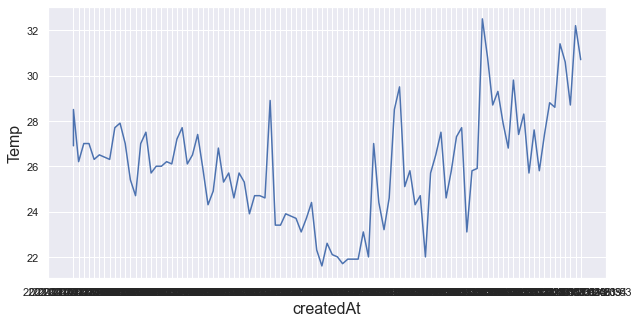

In [564]:
#View train data
plt.figure(figsize=(10,5))
plt.plot(train_combined['createdAt'],train_combined['Temp1'])
plt.xlabel('createdAt',fontsize=16)
plt.ylabel('Temp',fontsize=16)
plt.show()

#### Set test and training data

In [565]:
import datetime as dt
# Training data
train_combined['Time'] = np.arange(len(train_combined.index))
train_combined['DateTime'] = pd.to_datetime(train_combined['createdAt'])
train_combined['Timestamp'] = train_combined.DateTime.values.astype(np.int64) // 10 ** 9
train_combined.sort_values(by='Timestamp')

reg_X = train_combined.loc[:, ['Timestamp']]
reg_y = train_combined.loc[:, ['Temp1']]

# Test data
test_combined['Time'] = np.arange(len(test_combined.index))
test_combined['DateTime'] = pd.to_datetime(test_combined['createdAt'])
test_combined['Timestamp'] = test_combined.DateTime.values.astype(np.int64) // 10 ** 9
test_combined.sort_values(by='Timestamp')

reg_test_X = test_combined.loc[:, ['Timestamp']]
reg_test_y = test_combined.loc[:, ['Temp1']]


#### Model training

In [566]:
# Train linear model
from sklearn.linear_model import LinearRegression
# Train the model with train data
linear_model = LinearRegression()
linear_model.fit(reg_X, reg_y)

#prediction for each x value
lin_y_pred = pd.DataFrame(index=train_combined.index)
lin_y_pred['pred'] = linear_model.predict(reg_X)
lin_y_pred = lin_y_pred.loc[:, ['pred']]
#print(y_pred)


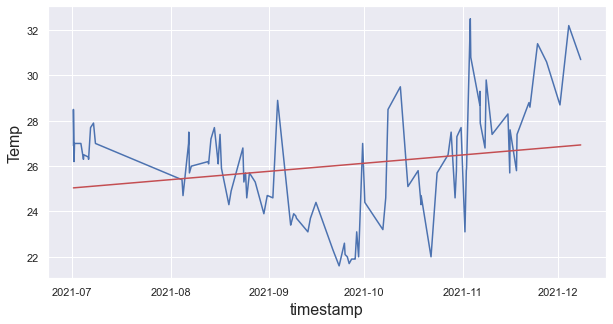

In [567]:
plt.figure(figsize=(10,5))
plt.plot(train_combined['DateTime'],train_combined['Temp1'])
plt.plot(train_combined['DateTime'], lin_y_pred, "r-")
plt.xlabel('timestamp',fontsize=16)
plt.ylabel('Temp',fontsize=16)
plt.show()

In [568]:
#linear prediction
# R^2 coefficient of determination. Regression score function. 1.0 is best possible value
lin_reg_y_preds = linear_model.predict(reg_test_X)

In [569]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lin_reg_r2_score = r2_score(reg_test_y, lin_reg_y_preds)
lin_reg_mse = mean_squared_error(reg_test_y, lin_reg_y_preds)

print(lin_reg_r2_score)
print(lin_reg_mse)

0.13472944560042854
5.69485965008612


#### Polynomial

##### Prepare data

In [573]:
train_combined['CO2'] = filled_jumo_data['CO2']
pol_reg_X_jumo = pd.DataFrame({'Timestamp': train_combined['Timestamp'],'CO2': train_combined['CO2']})
pol_reg_y_jumo = train_combined['Temp1']
pol_reg_X_train, pol_reg_X_test, pol_reg_y_train, pol_reg_y_test = train_test_split(pol_reg_X_jumo, pol_reg_y_jumo, test_size=0.2, random_state=0)

##### create polynomial features

In [575]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly_train = poly_features.fit_transform(pol_reg_X_train)
poly_features.fit(pol_reg_X_train, pol_reg_y_train)


PolynomialFeatures(include_bias=False)

##### Fit Model

58691     25.9
260382    29.8
7390      26.2
161496    21.9
238231    27.3
293883    28.8
33921     25.7
236929    24.6
159108    21.9
300534    31.4
157310    21.7
284347    27.4
245310    25.8
29013     24.7
17731     26.4
76777     25.3
53171     27.7
56467     26.5
81236     25.7
17836     26.3
Name: Temp1, dtype: object
[24.47451542 27.35438098 27.90898851 24.147088   26.8734024  29.0696978
 25.05515893 26.89302465 24.92687737 28.45502181 24.77083712 27.52798586
 27.19651192 25.587388   28.04155042 25.08333066 24.31511207 25.32484565
 24.2421393  28.11433802]


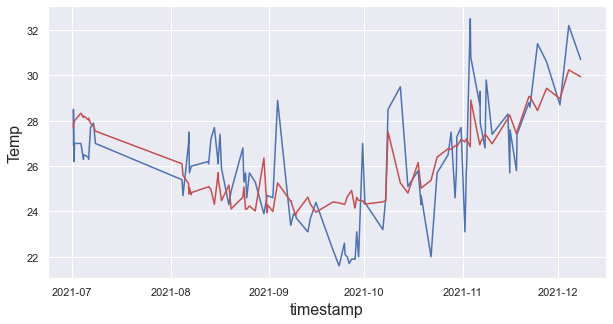

In [576]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_poly_train, pol_reg_y_train)
pol_reg_y_pred = poly_model.predict(poly_features.fit_transform(pol_reg_X_test))
pol_reg_y_pred_train = poly_model.predict(poly_features.fit_transform(pd.DataFrame({'Timestamp': train_combined['Timestamp'], 'CO2': train_combined['CO2']})))
print(pol_reg_y_test.head(5))
print(pol_reg_y_pred.head(5))

plt.figure(figsize=(10,5))
plt.plot(train_combined['DateTime'],train_combined['Temp1'])
plt.plot(train_combined['DateTime'], pol_reg_y_pred_train, "r-")
plt.xlabel('timestamp',fontsize=16)
plt.ylabel('Temp',fontsize=16)
plt.show()

In [577]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pol_reg_r2_score = r2_score(pol_reg_y_test, pol_reg_y_pred)
pol_reg_mse = mean_squared_error(pol_reg_y_test, pol_reg_y_pred)

print(pol_reg_r2_score)
print(pol_reg_mse)


0.3655686449548605
3.6463942131219396
